In [47]:
import pandas as pd

In [48]:
df = pd.read_excel('coins_data.xlsx')
df.head()

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3.586504e+09,985239504,PoS,Ethereum
1,UNI,9.918768e+07,3.992451e+09,1000000000,PoS,Ethereum
2,WBTC,1.415410e+08,4.237575e+09,163106,PoW,Ethereum
3,AVAX,2.197065e+08,4.901630e+09,431804080,PoS,Avalanche
4,DAI,2.177113e+08,5.513661e+09,5347888596,stablecoin,Ethereum


In [49]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


20


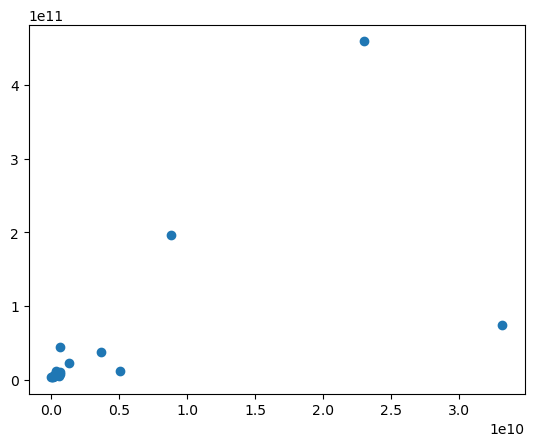

In [50]:
data = df[['Volume', 'MarketCap']].copy()
print(len(data))
plt.scatter(data['Volume'], data['MarketCap'])
plt.show()

In [51]:
from sklearn.preprocessing import StandardScaler
standarder = StandardScaler()

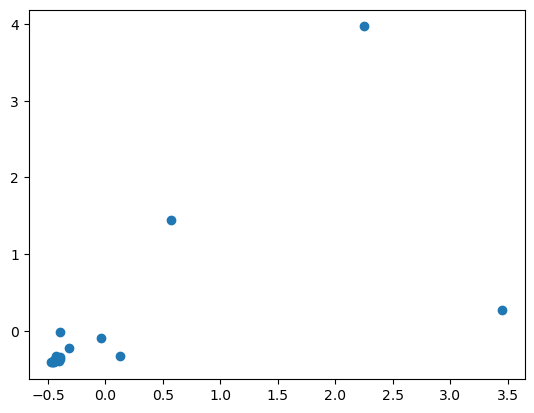

In [52]:
standardized_data = standarder.fit_transform(data)
data = pd.DataFrame(standardized_data, columns=['Volume', 'MarketCap'])

plt.scatter(data['Volume'], data['MarketCap'])
plt.show()

'euclidean' is out of metrics after tests, because of not good answers. ('chebyshev', 'cityblock', 'correlation', 'cosine', 'hamming')

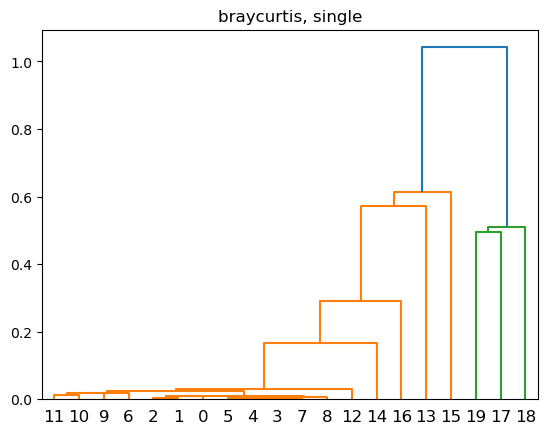

couldn't do braycurtis and ward


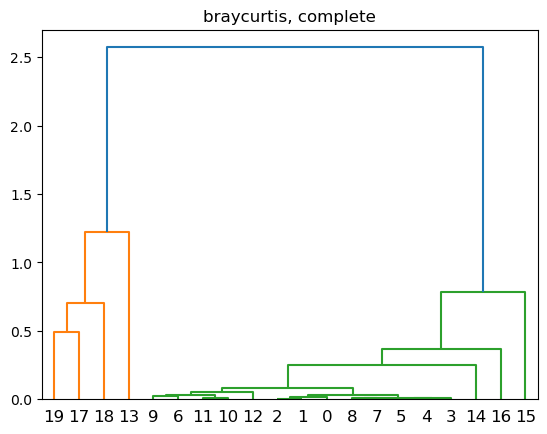

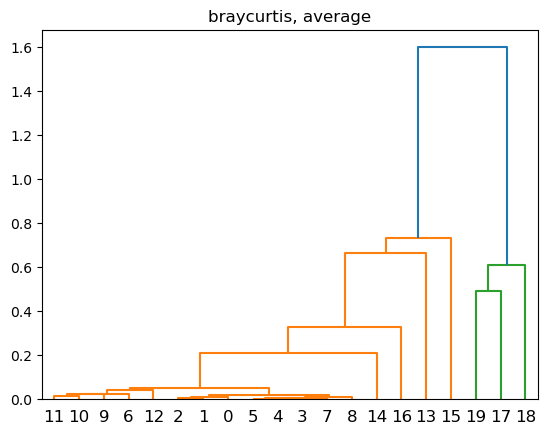

couldn't do braycurtis and centroid
couldn't do braycurtis and median


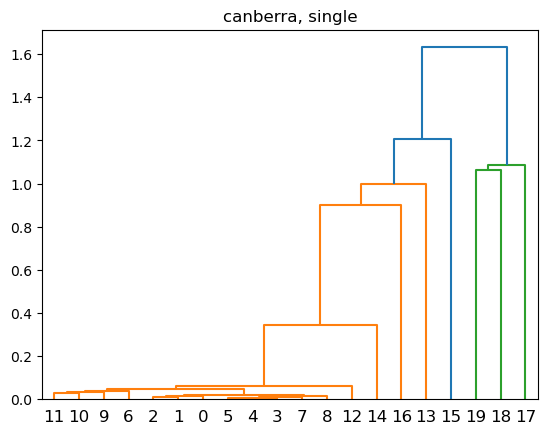

couldn't do canberra and ward


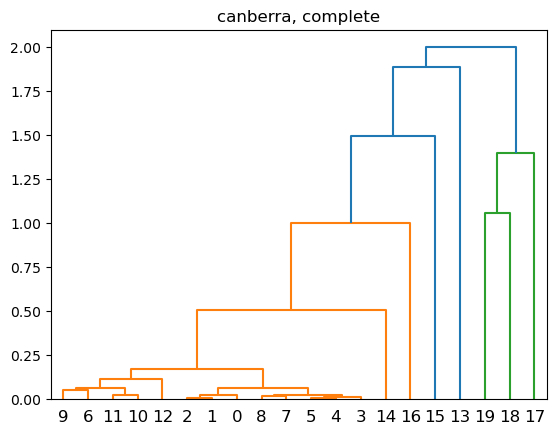

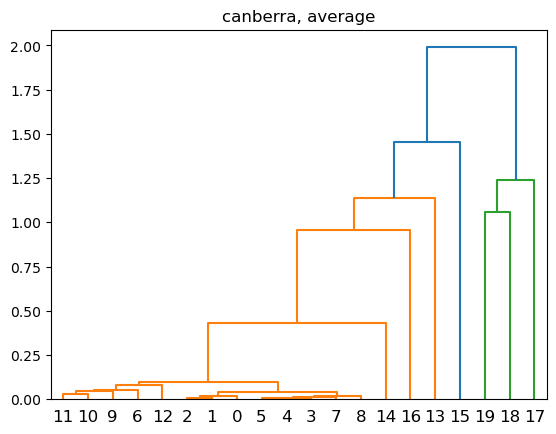

couldn't do canberra and centroid
couldn't do canberra and median


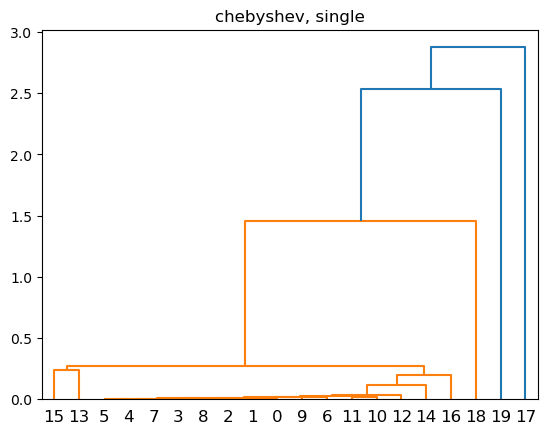

couldn't do chebyshev and ward


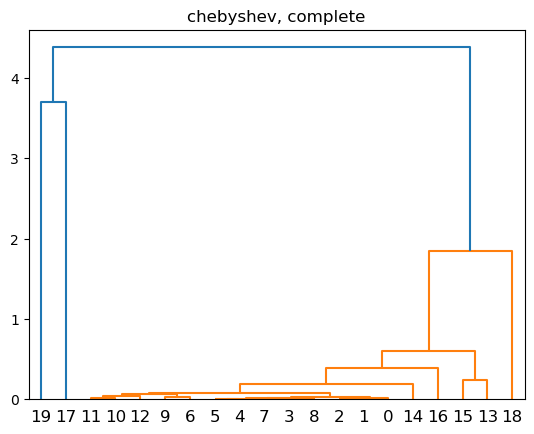

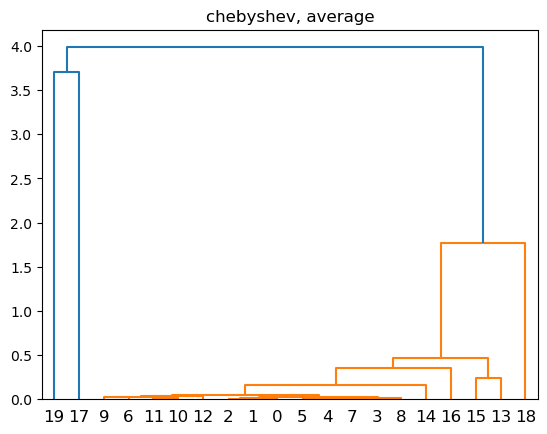

couldn't do chebyshev and centroid
couldn't do chebyshev and median


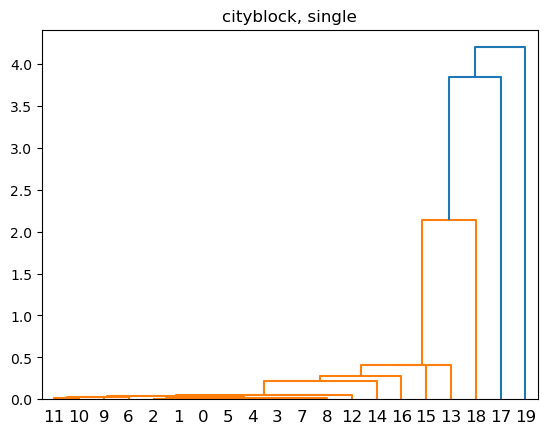

couldn't do cityblock and ward


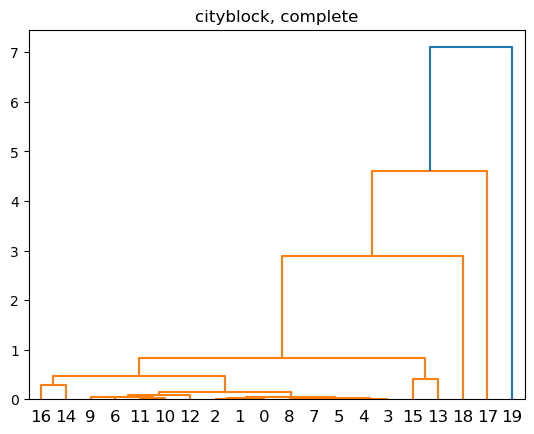

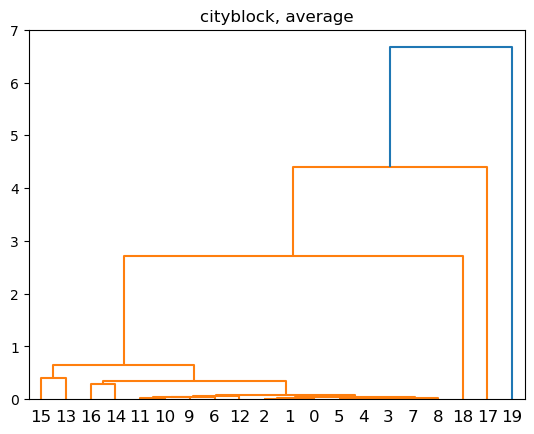

couldn't do cityblock and centroid
couldn't do cityblock and median


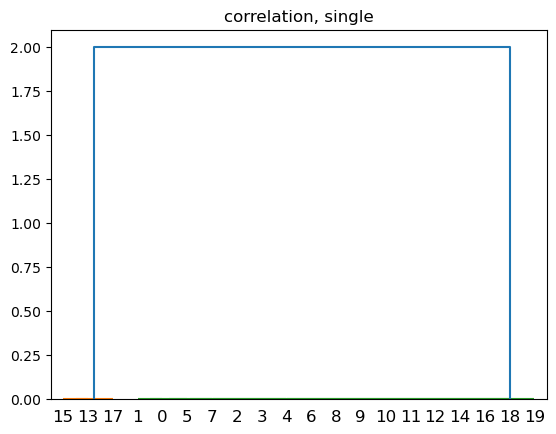

couldn't do correlation and ward


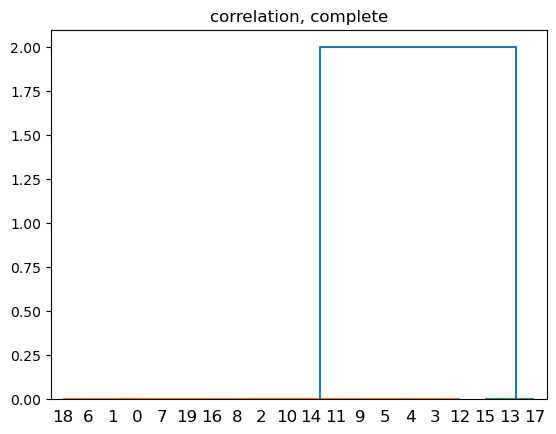

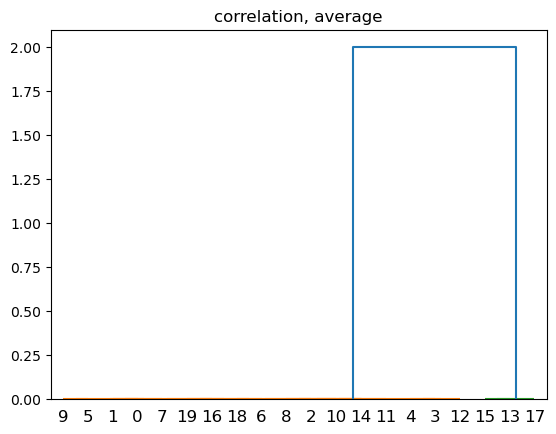

couldn't do correlation and centroid
couldn't do correlation and median


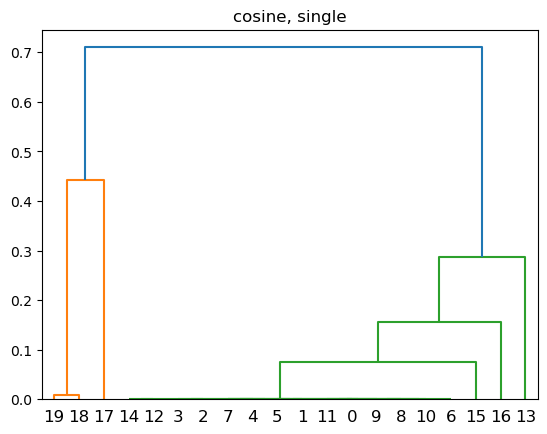

couldn't do cosine and ward


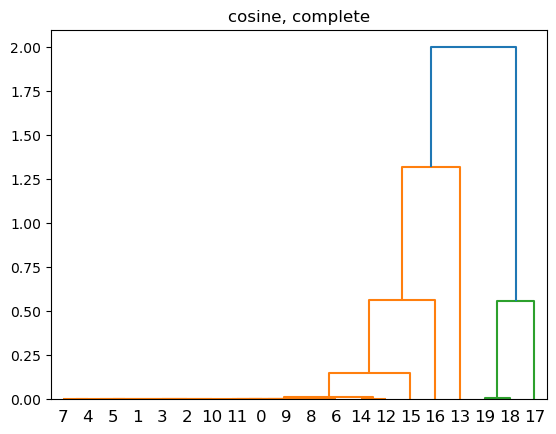

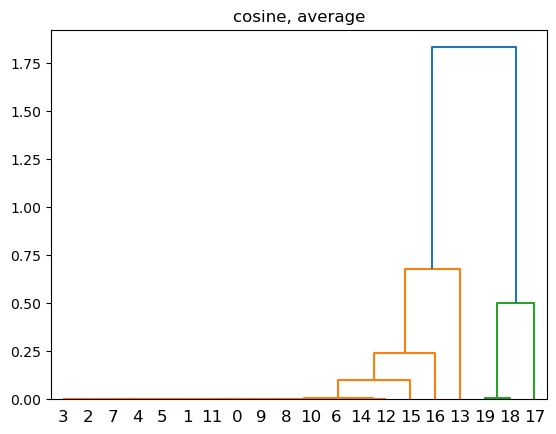

couldn't do cosine and centroid
couldn't do cosine and median


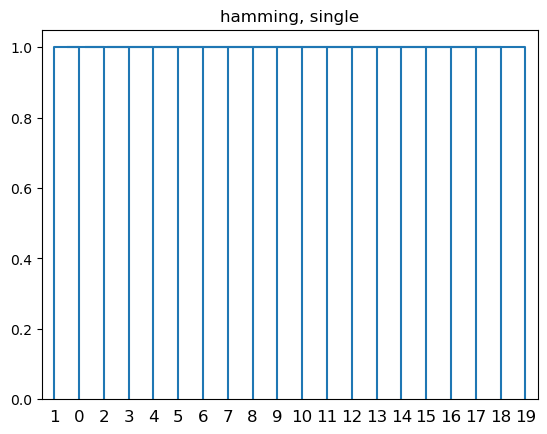

couldn't do hamming and ward


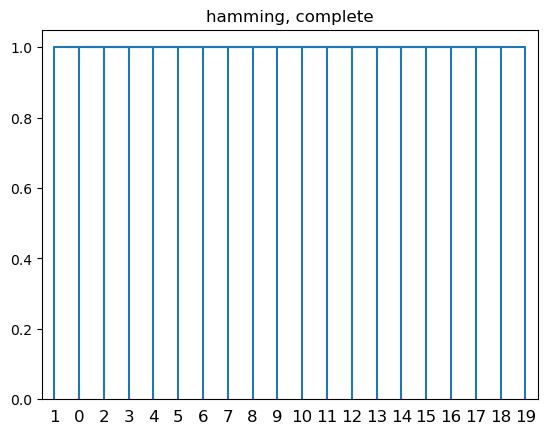

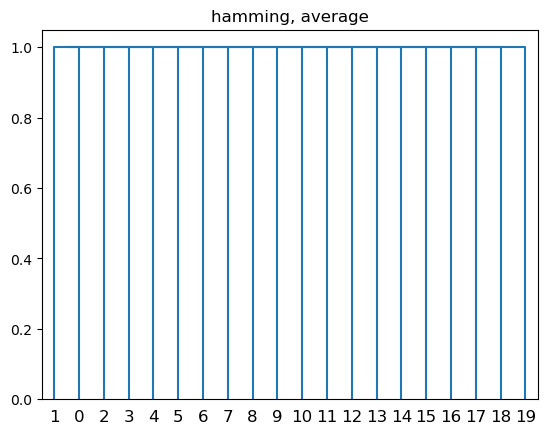

couldn't do hamming and centroid
couldn't do hamming and median


In [53]:
metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'hamming']
methods = ['single', 'ward', 'complete', 'average', 'centroid', 'median']

for metric in metrics:
    for method in methods:
        try:
            linkage_data = linkage(data, method=method, metric=metric)
            dendrogram(linkage_data, orientation = 'top', distance_sort='descending', show_leaf_counts=True)

            plt.title(f'{metric}, {method}')
            plt.show()
        except:
            print(f"couldn't do {metric} and {method}")


In [54]:
data = df[['Volume', 'MarketCap', 'ProofType']].copy()
print(len(data))
data.head()

20


,Volume,MarketCap,ProofType
0,1.823284e+06,3.586504e+09,PoS
1,9.918768e+07,3.992451e+09,PoS
2,1.415410e+08,4.237575e+09,PoW
3,2.197065e+08,4.901630e+09,PoS
4,2.177113e+08,5.513661e+09,stablecoin


In [59]:
standardized_data = standarder.fit_transform(data[['Volume', 'MarketCap']])
data[['Volume', 'MarketCap']] = pd.DataFrame(standardized_data, columns=['Volume', 'MarketCap'])
print(data)

      Volume  MarketCap  ProofType
0  -0.471646  -0.414120          1
1  -0.460130  -0.410214          1
2  -0.455120  -0.407855          2
3  -0.445875  -0.401465          1
4  -0.446111  -0.395576          4
5  -0.442529  -0.394685          1
6  -0.401924  -0.393502          2
7  -0.439701  -0.390715          1
8  -0.447785  -0.384550          2
9  -0.421795  -0.371141          1
10 -0.396886  -0.368285          0
11 -0.397211  -0.349113          2
12 -0.428714  -0.332113          1
13  0.129509  -0.331884          4
14 -0.312278  -0.221722          3
15 -0.038288  -0.089553          4
16 -0.391338  -0.019482          1
17  3.448978   0.269075          4
18  0.574149   1.438120          1
19  2.244695   3.968780          2


In [64]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter3d(
    x=data['Volume'],
    y=data['MarketCap'],
    z=data['ProofType'],
    mode = 'markers',
    marker = dict(
        sizemode = 'diameter',
        sizeref = 750,
        color='blue'
        )
))


fig.show()

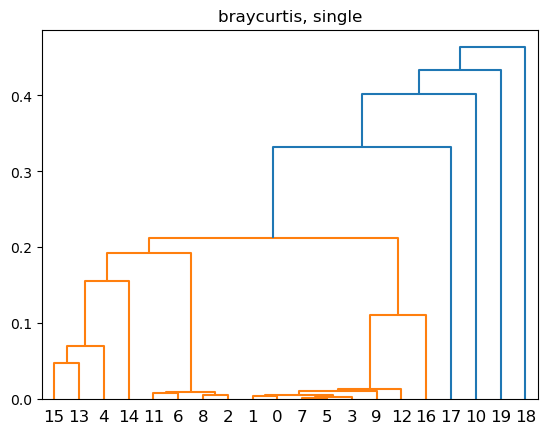

couldn't do braycurtis and ward


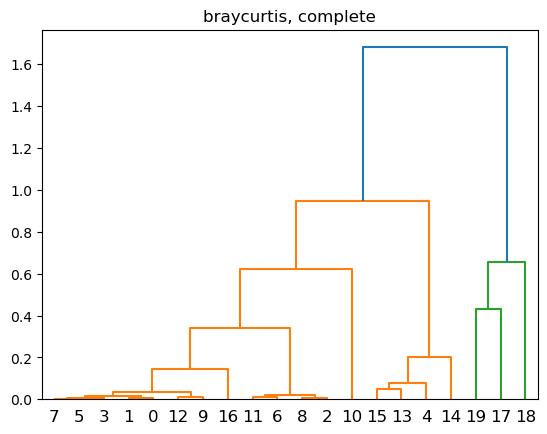

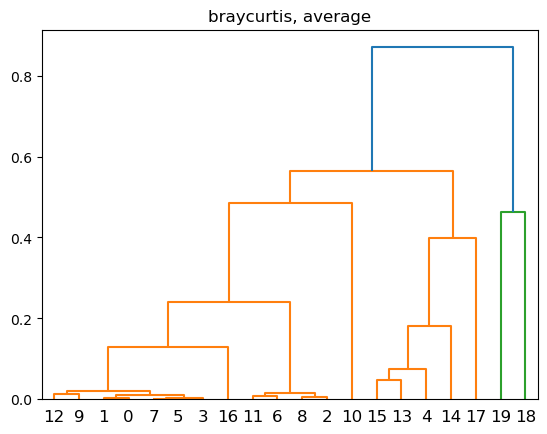

couldn't do braycurtis and centroid
couldn't do braycurtis and median


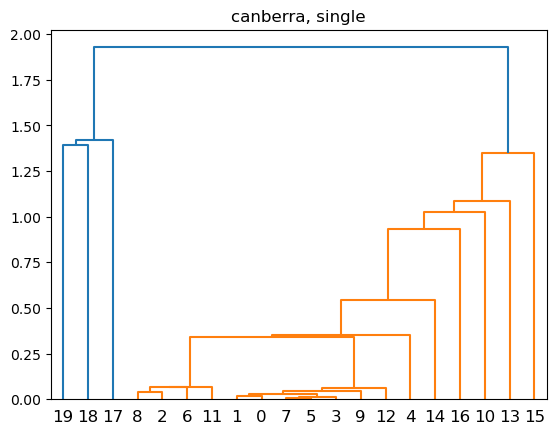

couldn't do canberra and ward


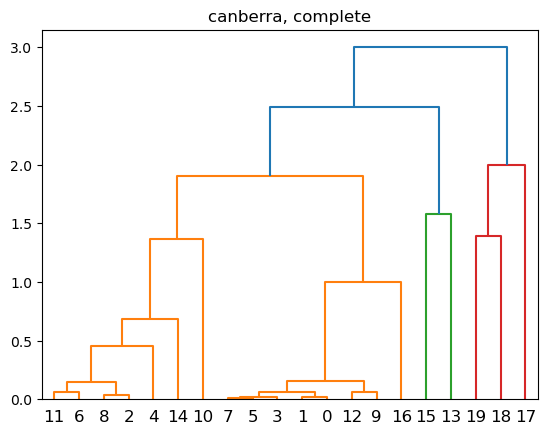

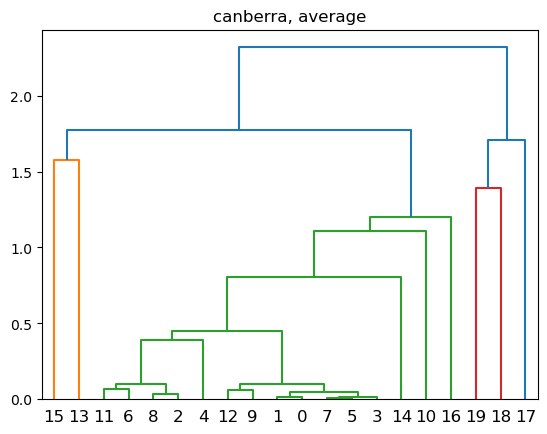

couldn't do canberra and centroid
couldn't do canberra and median


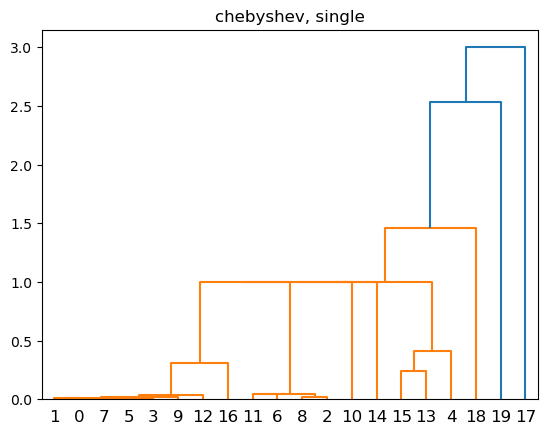

couldn't do chebyshev and ward


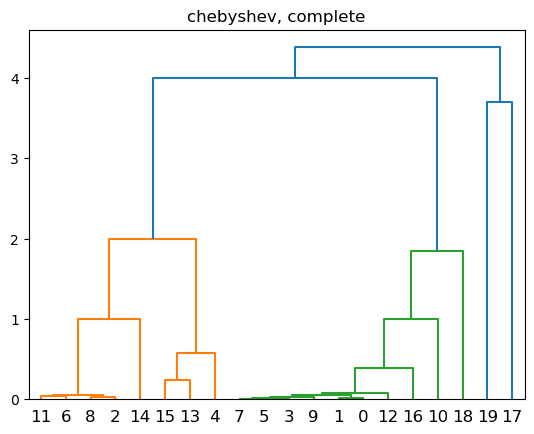

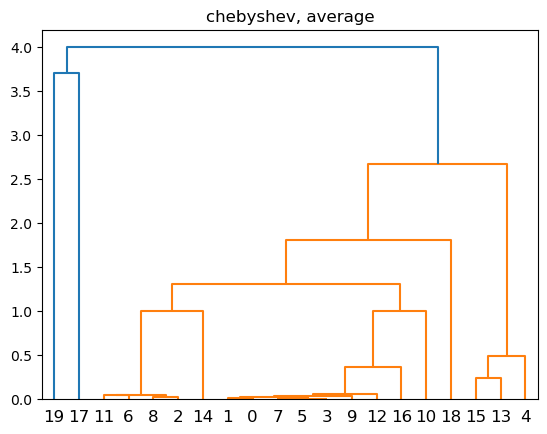

couldn't do chebyshev and centroid
couldn't do chebyshev and median


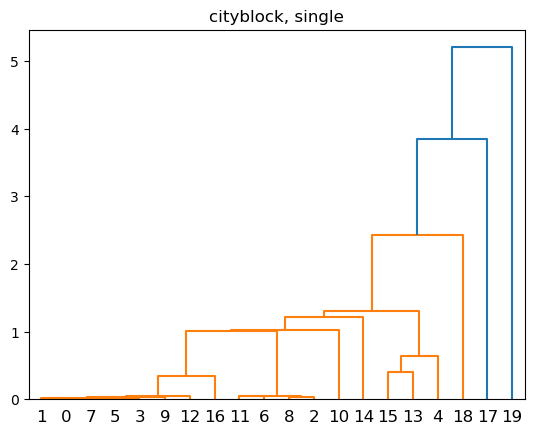

couldn't do cityblock and ward


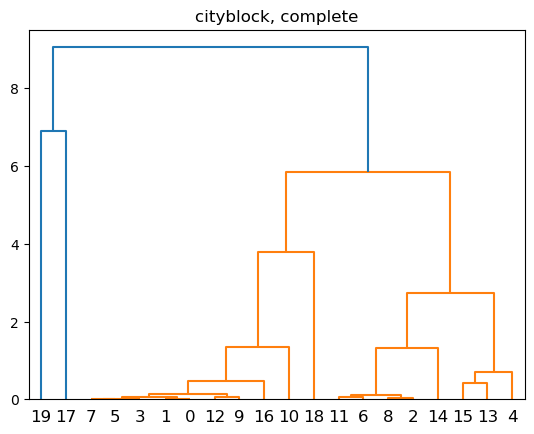

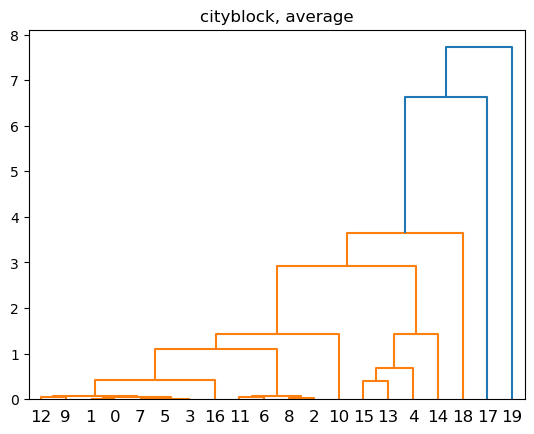

couldn't do cityblock and centroid
couldn't do cityblock and median


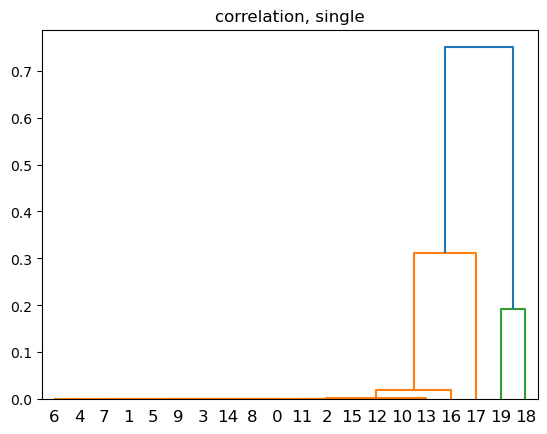

couldn't do correlation and ward


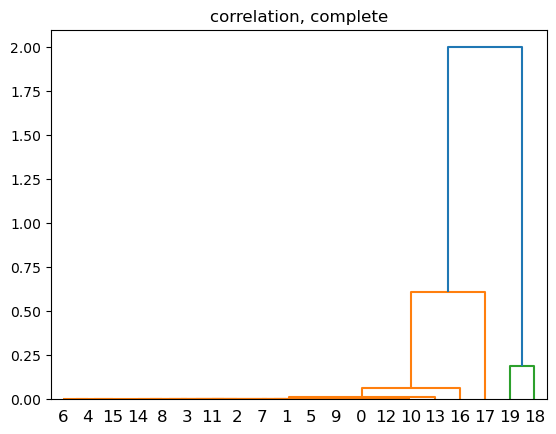

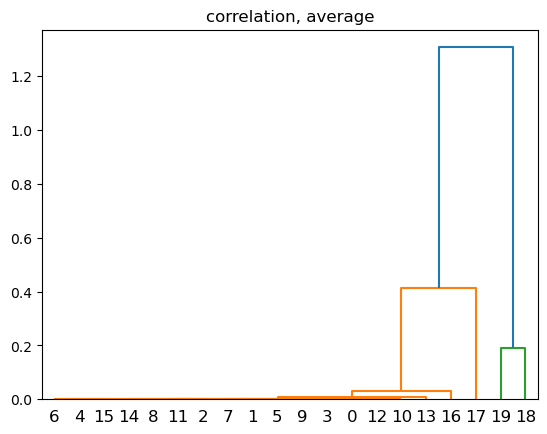

couldn't do correlation and centroid
couldn't do correlation and median


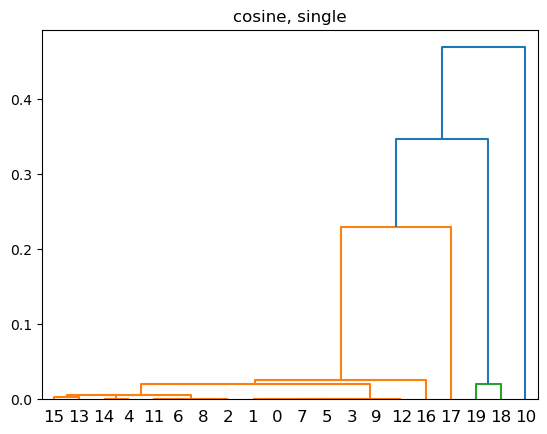

couldn't do cosine and ward


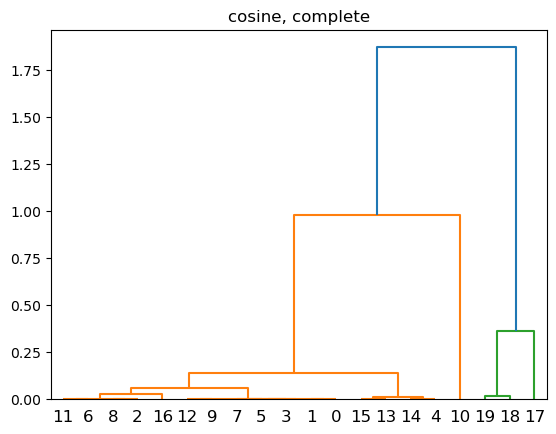

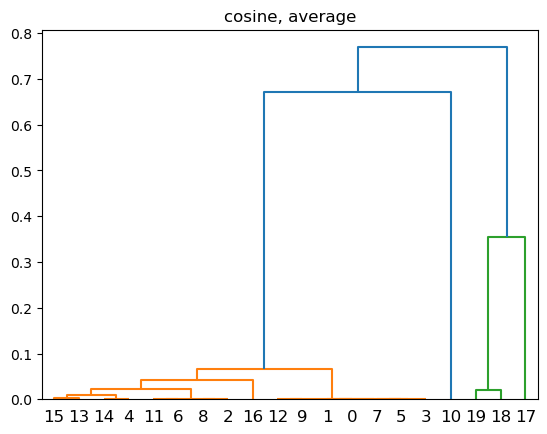

couldn't do cosine and centroid
couldn't do cosine and median


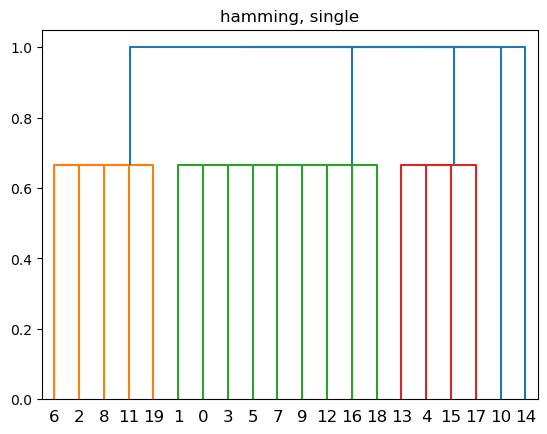

couldn't do hamming and ward


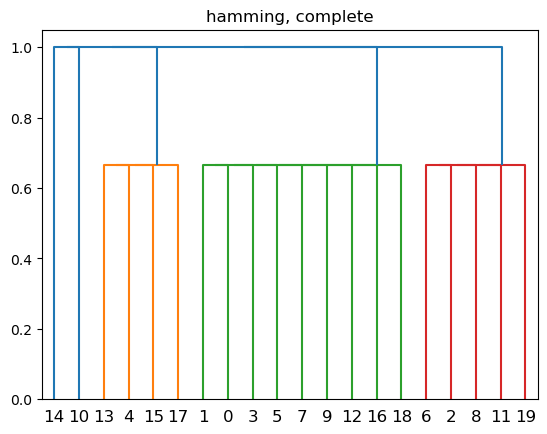

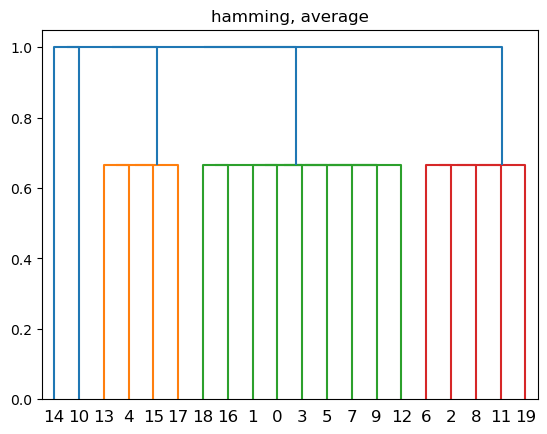

couldn't do hamming and centroid
couldn't do hamming and median


In [58]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['ProofType'] = label_encoder.fit_transform(df['ProofType'])

metrics = ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'hamming']
methods = ['single', 'ward', 'complete', 'average', 'centroid', 'median']


for metric in metrics:
    for method in methods:
        try:
            linkage_data = linkage(data, method=method, metric=metric)
            dendrogram(linkage_data, orientation = 'top', distance_sort='descending', show_leaf_counts=True)

            plt.title(f'{metric}, {method}')
            plt.show()
        except:
            print(f"couldn't do {metric} and {method}")